##### World Happiness Report Project

###### Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the 

second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by 

their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. 

The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness 

indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, 

national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess 

the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness 

explains personal and national variations in happiness.

What is Dystopia?


Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a 

benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each

of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key 

variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, 

lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as 

“Dystopia,” in contrast to Utopia.

What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- 

or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of 

countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.


###### Dataset Link-
https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/World%20Happiness/happiness_score_dataset.csv


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [154]:
happiness_data=pd.read_csv('happiness_score_dataset.csv')
happiness_data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [155]:
happiness_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [156]:
# Check the column details
happiness_data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [157]:
# check the shape of the data
happiness_data.shape

(158, 12)

In [158]:
happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [159]:
# Get basic description of the data, looking the spread of the different variables,
# along with  abrupt changes between the minimum, 25th, 50th, 75th, and max for the different variables
happiness_data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [160]:
#Check the null values
happiness_data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [161]:
happiness_data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [162]:
happiness_data['Happiness Score'].value_counts(normalize=True)

5.192    0.012658
7.587    0.006329
4.686    0.006329
4.839    0.006329
4.800    0.006329
           ...   
5.855    0.006329
5.848    0.006329
5.833    0.006329
5.828    0.006329
2.839    0.006329
Name: Happiness Score, Length: 157, dtype: float64

<Axes: >

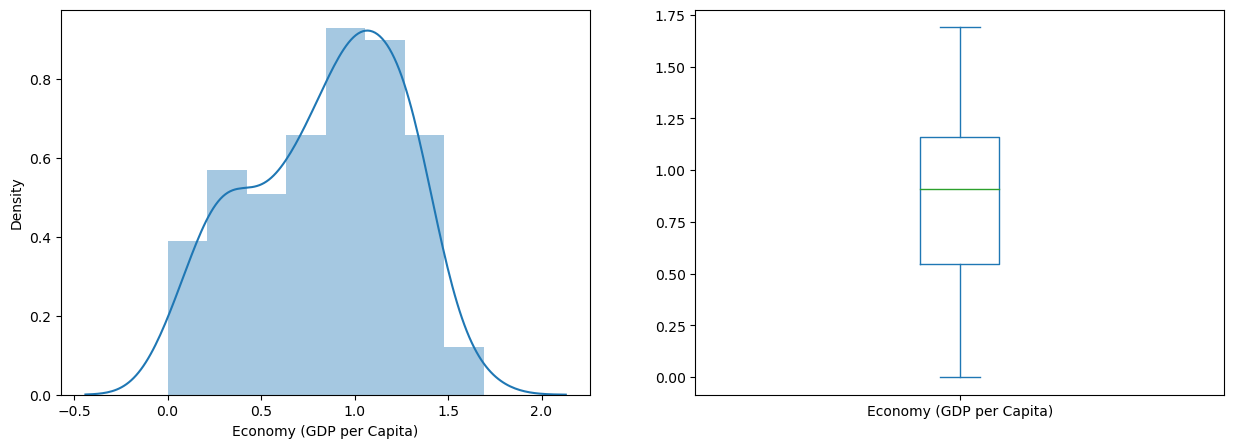

In [163]:
plt.figure(2)
plt.subplot(121)
sns.distplot(happiness_data['Economy (GDP per Capita)'])
plt.subplot(122)
happiness_data['Economy (GDP per Capita)'].plot.box(figsize=(15,5))

<Axes: >

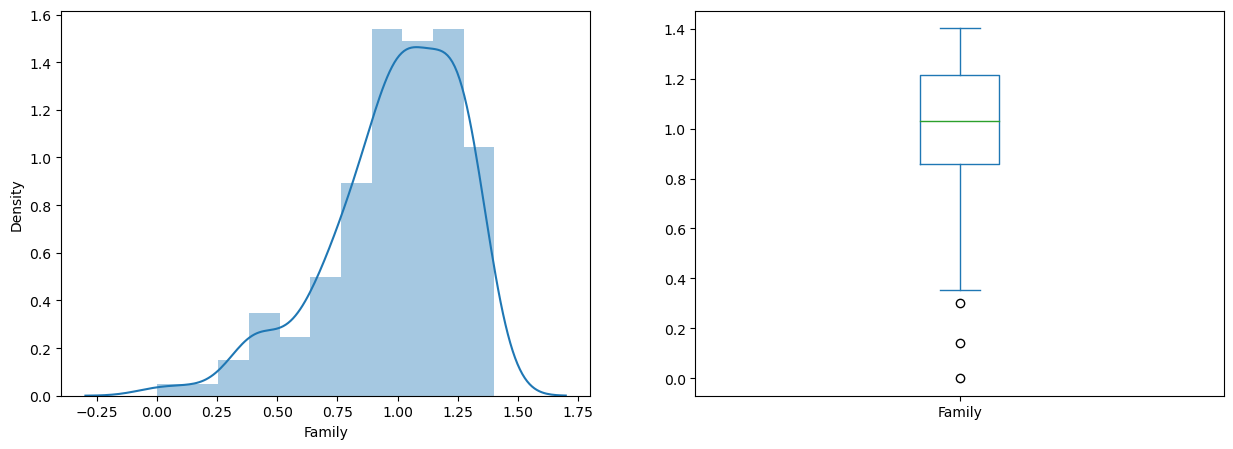

In [164]:
plt.figure(2)
plt.subplot(121)
sns.distplot(happiness_data['Family'])
plt.subplot(122)
happiness_data['Family'].plot.box(figsize=(15,5))

<Axes: >

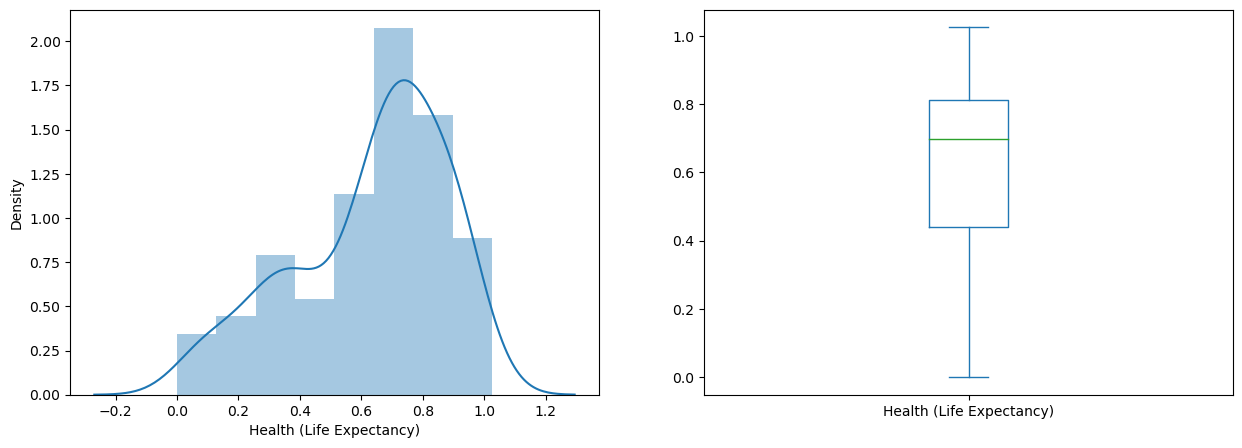

In [165]:
plt.figure(2)
plt.subplot(121)
sns.distplot(happiness_data['Health (Life Expectancy)'])
plt.subplot(122)
happiness_data['Health (Life Expectancy)'].plot.box(figsize=(15,5))

<Axes: >

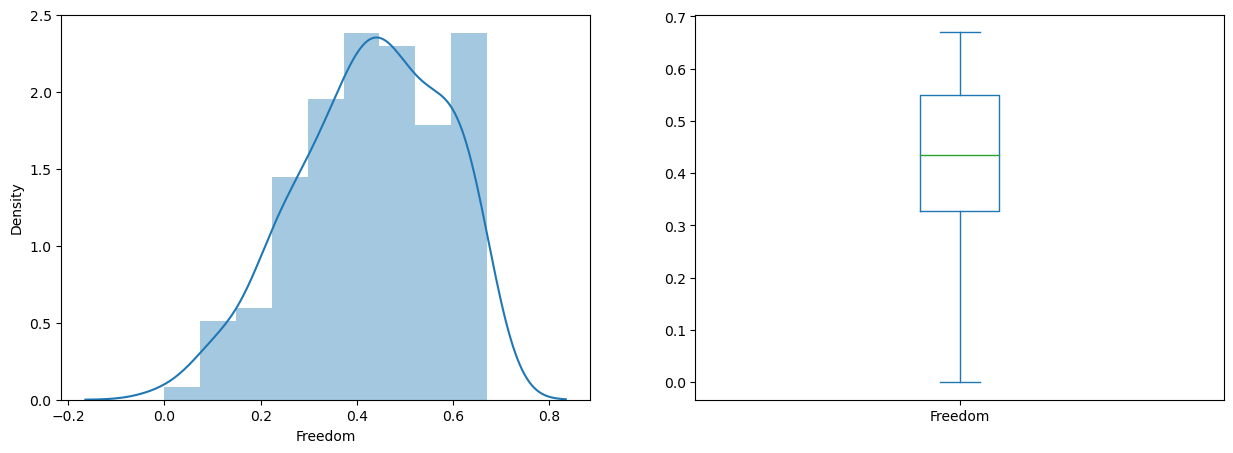

In [166]:
plt.figure(2)
plt.subplot(121)
sns.distplot(happiness_data['Freedom'])
plt.subplot(122)
happiness_data['Freedom'].plot.box(figsize=(15,5))

<Axes: >

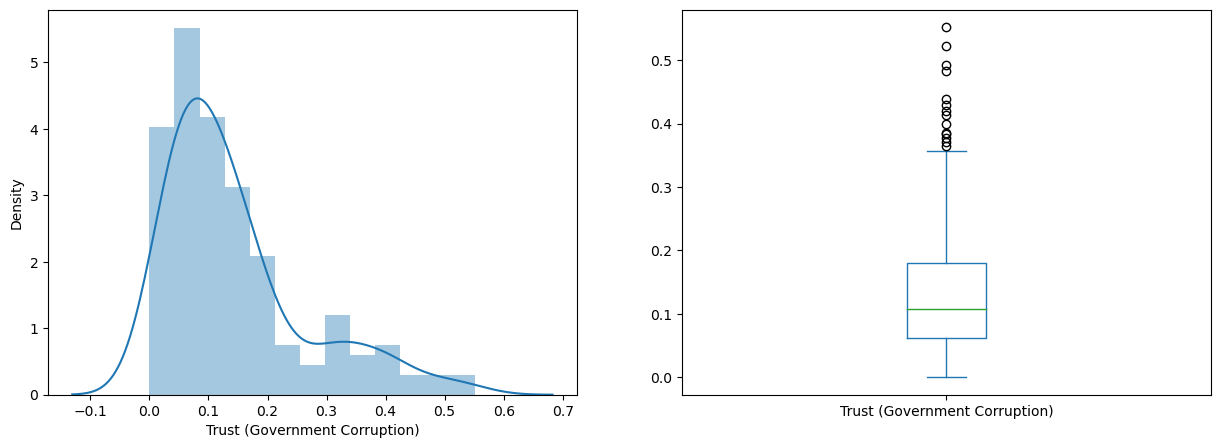

In [167]:
#Trust (Government Corruption)
plt.figure(2)
plt.subplot(121)
sns.distplot(happiness_data['Trust (Government Corruption)'])
plt.subplot(122)
happiness_data['Trust (Government Corruption)'].plot.box(figsize=(15,5))

<Axes: >

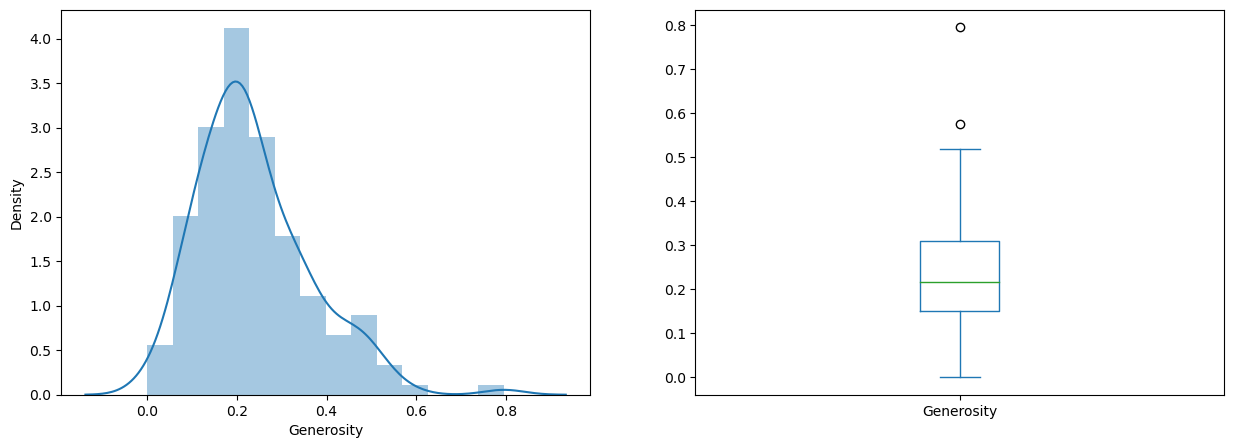

In [168]:
plt.figure(2)
plt.subplot(121)
sns.distplot(happiness_data['Generosity'])
plt.subplot(122)
happiness_data['Generosity'].plot.box(figsize=(15,5))

In [169]:
#Correlation matrix
corr = happiness_data.corr()
corr

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


Text(0.5, 1.0, 'Scatter plot between Economy GDP and Happiness Score')

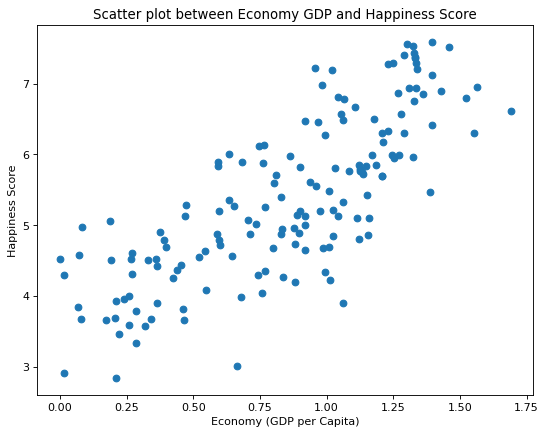

In [170]:

figure(figsize=(8, 6), dpi=80)
plt.scatter(happiness_data['Economy (GDP per Capita)'], happiness_data['Happiness Score'])

# label
plt.xlabel("Economy (GDP per Capita)")
plt.ylabel("Happiness Score")
plt.title("Scatter plot between Economy GDP and Happiness Score")

Text(0.5, 1.0, 'Scatter plot between Family and Happiness Score')

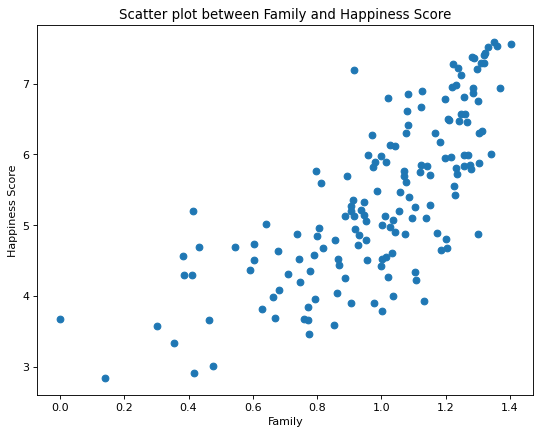

In [171]:

figure(figsize=(8, 6), dpi=80)
plt.scatter(happiness_data['Family'], happiness_data['Happiness Score'])

# label
plt.xlabel("Family")
plt.ylabel("Happiness Score")
plt.title("Scatter plot between Family and Happiness Score")

Text(0.5, 1.0, 'Scatter plot between Health Life and Happiness Score')

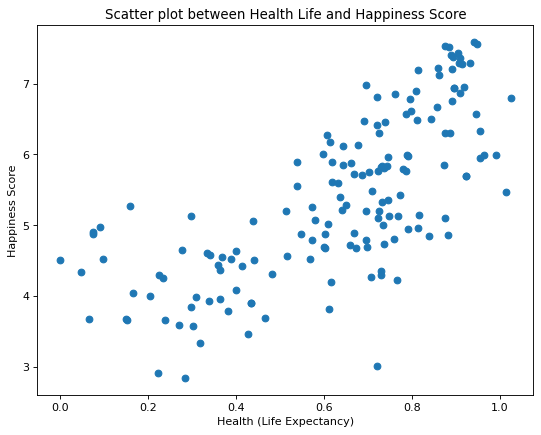

In [172]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(happiness_data['Health (Life Expectancy)'], happiness_data['Happiness Score'])

# label
plt.xlabel("Health (Life Expectancy)")
plt.ylabel("Happiness Score")
plt.title("Scatter plot between Health Life and Happiness Score")


Text(0.5, 1.0, 'Scatter plot between Freedom and Happiness Score')

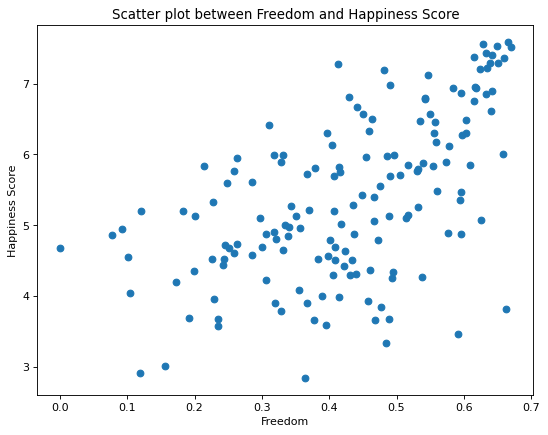

In [173]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(happiness_data['Freedom'], happiness_data['Happiness Score'])

# label
plt.xlabel("Freedom")
plt.ylabel("Happiness Score")
plt.title("Scatter plot between Freedom and Happiness Score")

Text(0.5, 1.0, 'Scatter plot between Trust (Government Corruption) and Happiness Score')

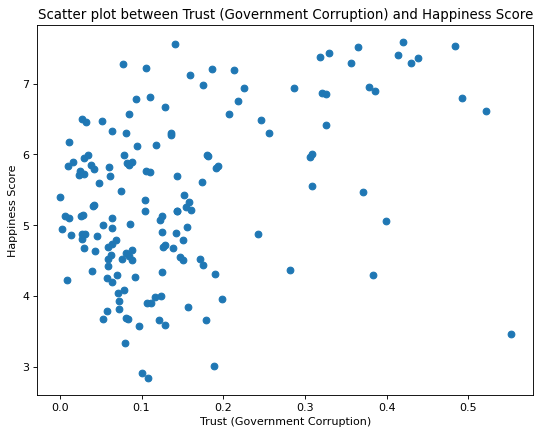

In [174]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(happiness_data['Trust (Government Corruption)'], happiness_data['Happiness Score'])

# label
plt.xlabel("Trust (Government Corruption)")
plt.ylabel("Happiness Score")
plt.title("Scatter plot between Trust (Government Corruption) and Happiness Score")

Text(0.5, 1.0, 'Scatter plot between Generosity and Happiness Score')

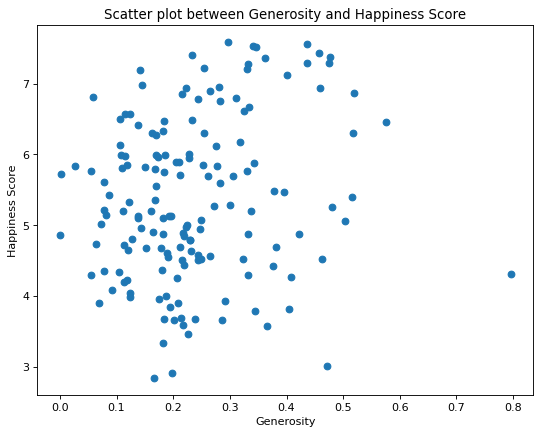

In [175]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(happiness_data['Generosity'], happiness_data['Happiness Score'])

# label
plt.xlabel("Generosity")
plt.ylabel("Happiness Score")
plt.title("Scatter plot between Generosity and Happiness Score")

Text(0.5, 1.0, 'Scatter plot between Dystopia Residual and Happiness Score')

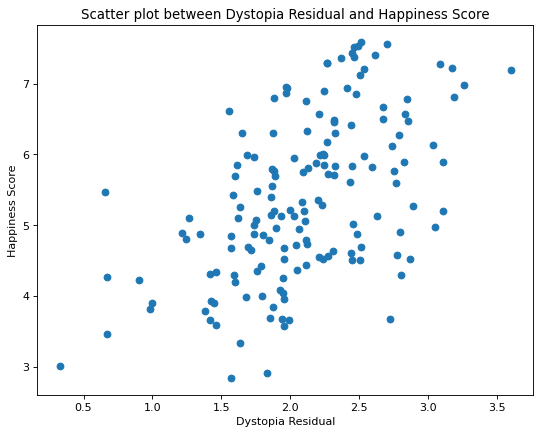

In [176]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(happiness_data['Dystopia Residual'], happiness_data['Happiness Score'])

# label
plt.xlabel("Dystopia Residual")
plt.ylabel("Happiness Score")
plt.title("Scatter plot between Dystopia Residual and Happiness Score")

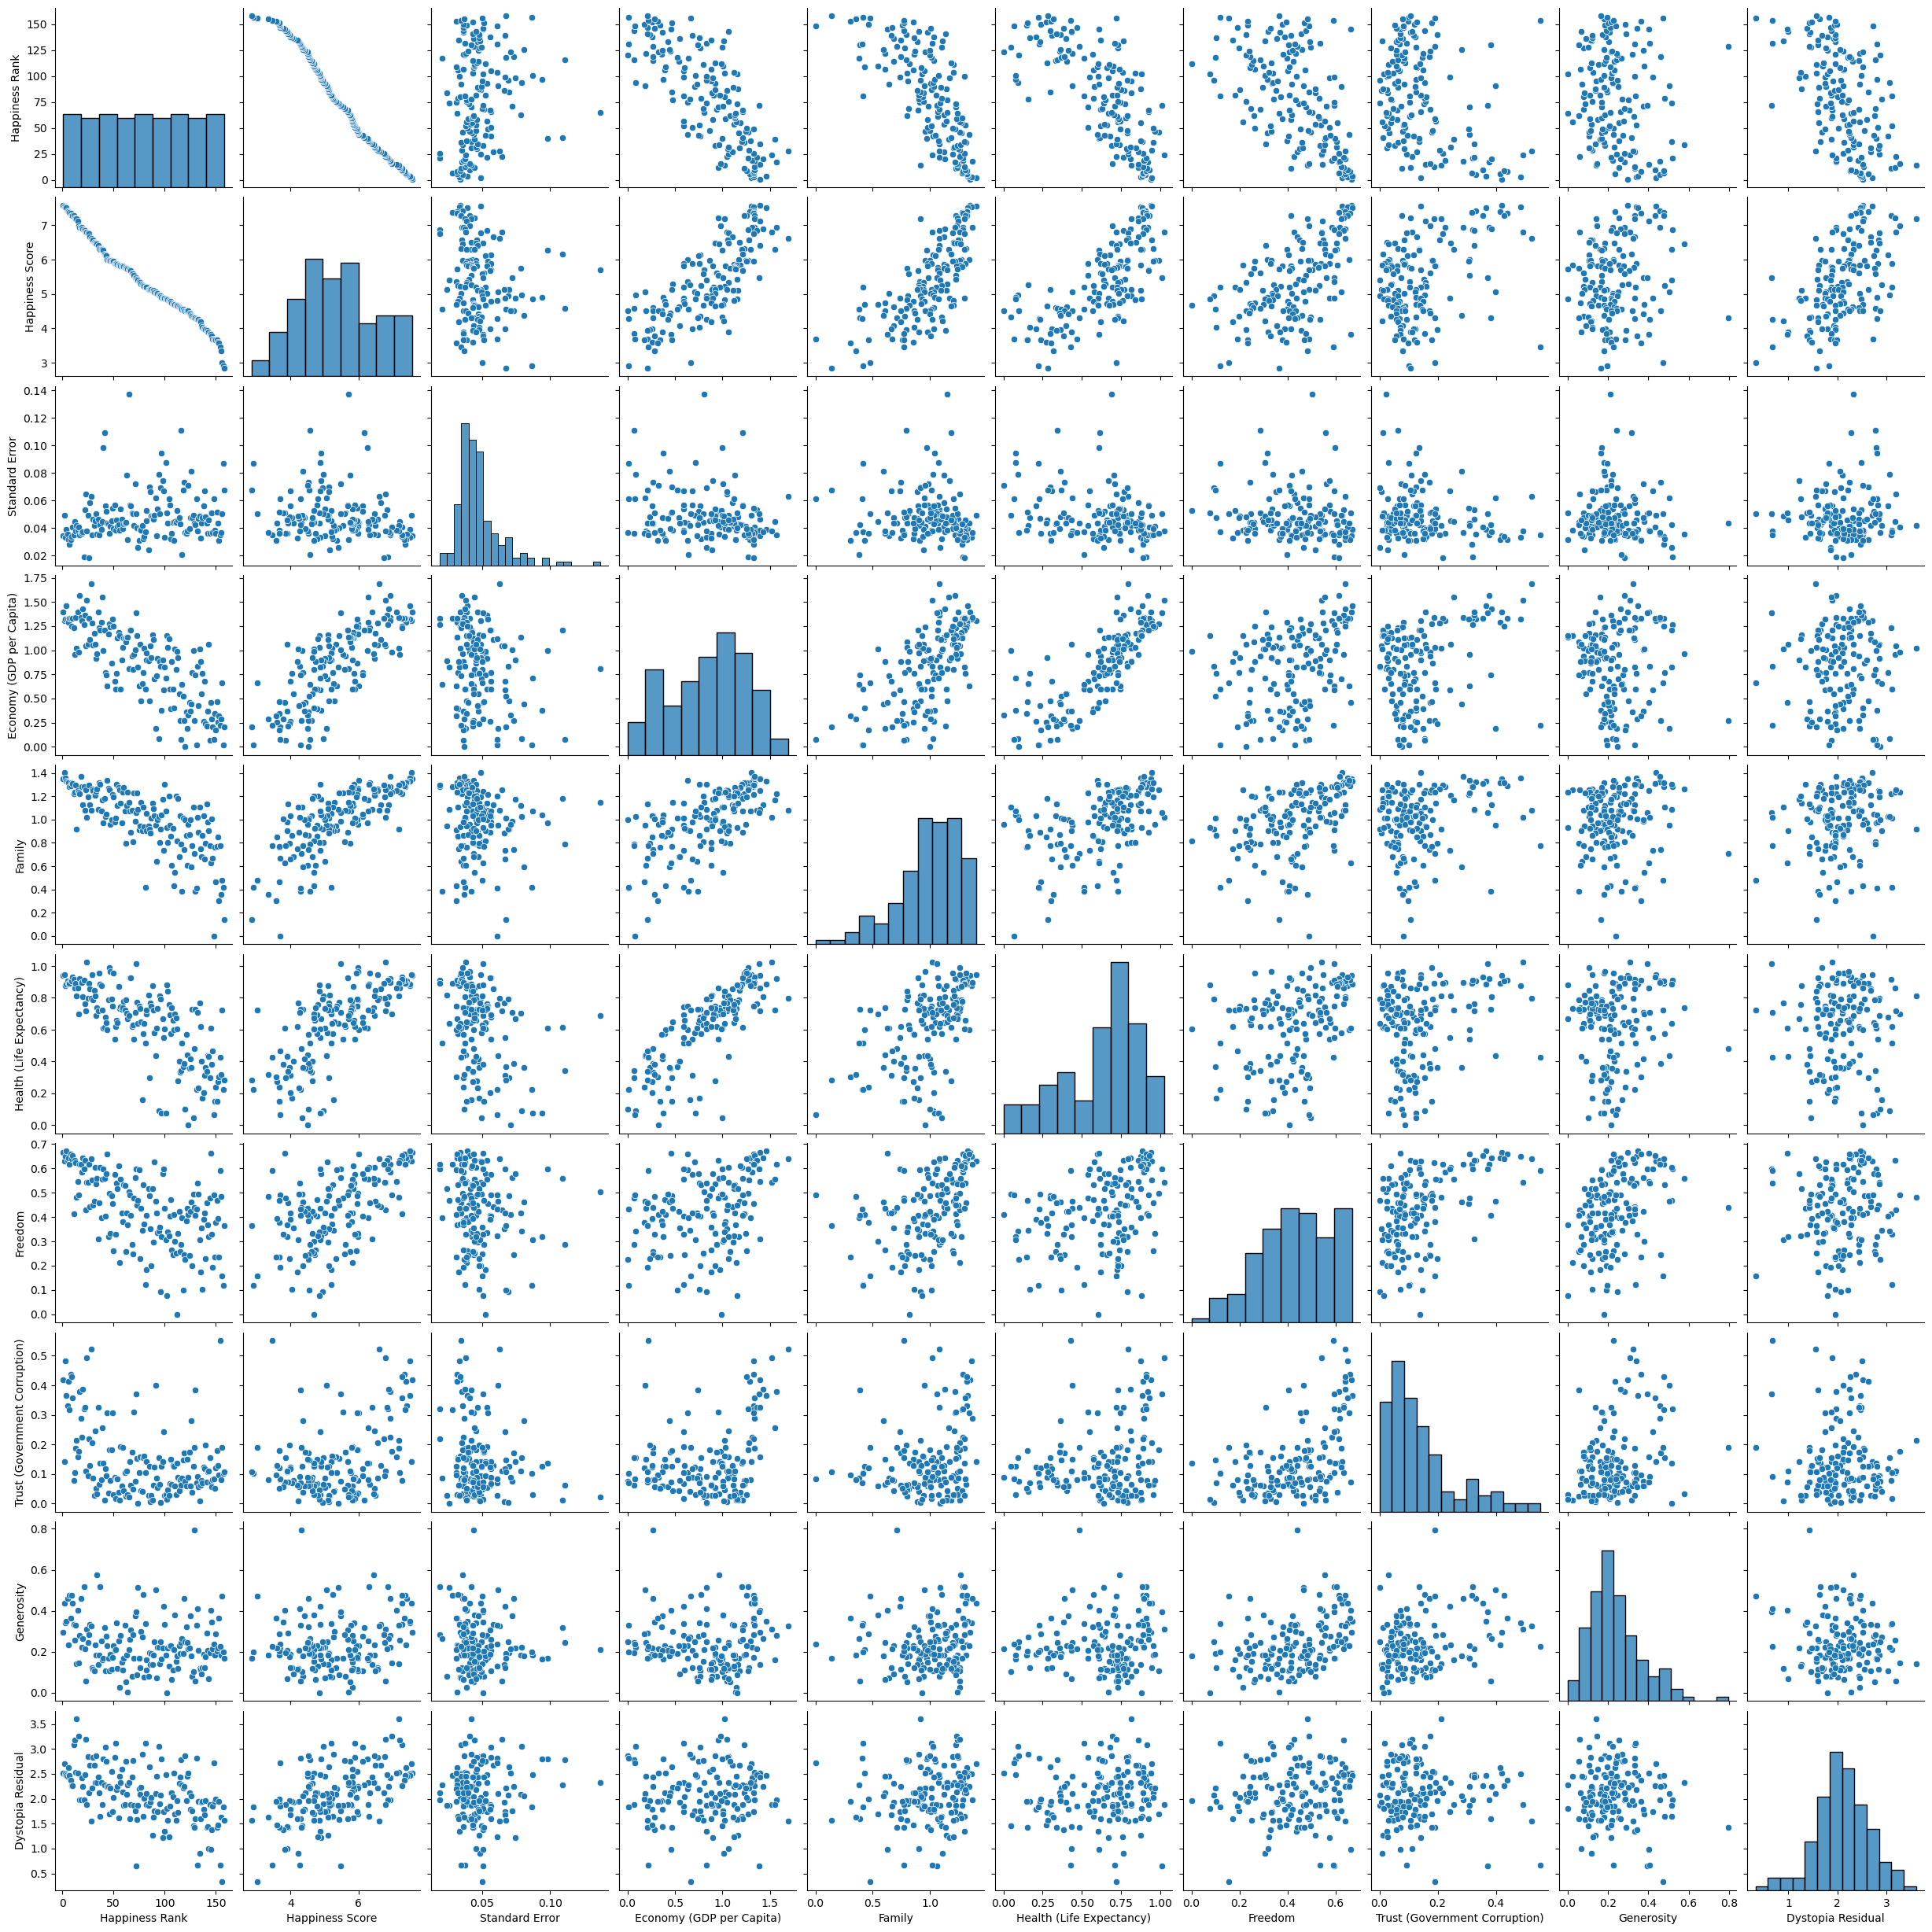

In [177]:
sns.pairplot(happiness_data)

In [178]:
# To check on the correlation
happiness_data.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<Axes: >

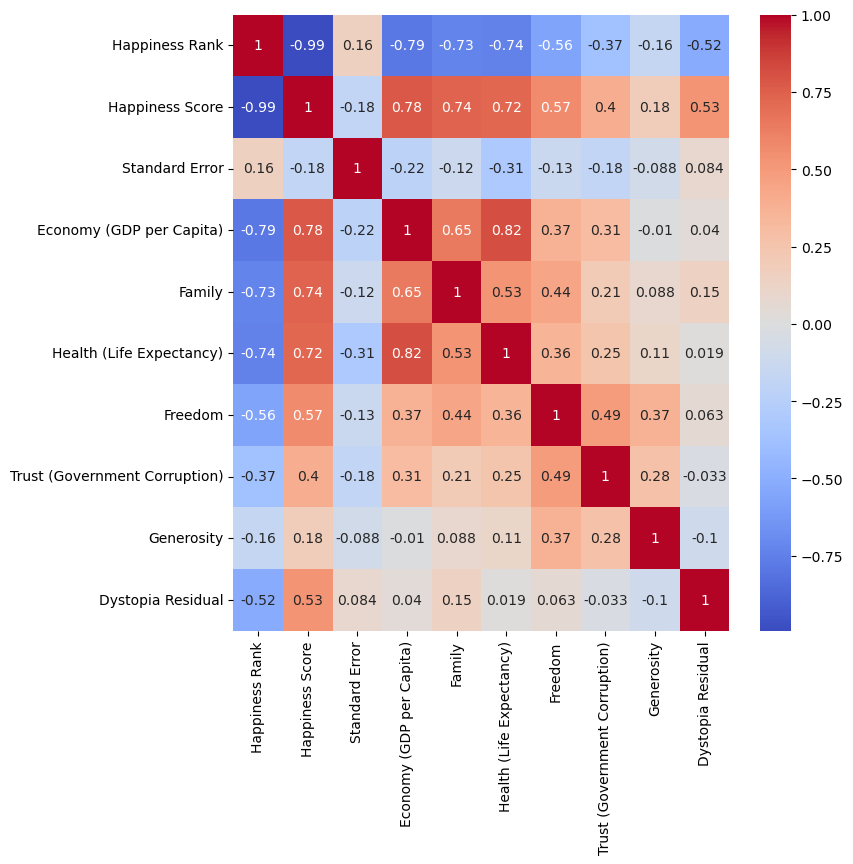

In [179]:
#build heatmap
plt.figure(figsize=(8,8))
sns.heatmap(happiness_data.corr(),cmap='coolwarm',annot=True)

<Axes: >

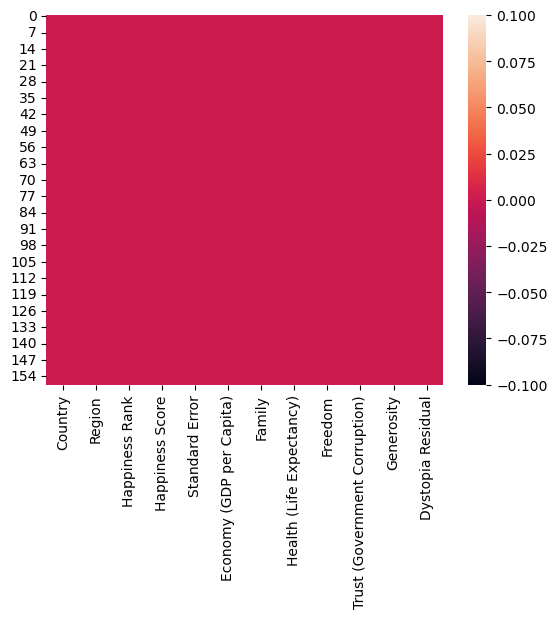

In [180]:
#Visualize the null value
sns.heatmap(happiness_data.isna())

In [181]:
happiness_data.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [182]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
happiness_data['Region']=le.fit_transform(happiness_data['Region'])
happiness_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [183]:
happiness_data.drop(['Country','Happiness Rank','Dystopia Residual','Standard Error'],axis=1,inplace=True)
happiness_data.head()

,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,9,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,9,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,9,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,9,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [184]:
happiness_data.columns

Index(['Region', 'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

In [185]:
#Separate the Independent and Dependent variable
x=happiness_data[['Region','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']]
y=happiness_data['Happiness Score']

In [186]:
x

,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,9,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,9,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,9,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,9,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
153,8,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,8,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,4,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,8,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [187]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [188]:
# split the train and test sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (126, 7)
x_test shape: (32, 7)
y_train shape: (126,)
y_test shape: (32,)


In [189]:
# Applying the standard scaling to the dataset to scale all the field values to same scale
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_train

array([[ 9.70027487e-01, -1.56665534e+00,  1.61839581e-01,
        -1.83327396e+00, -2.82819193e-01, -1.21129858e-01,
        -3.74746427e-01],
       [-1.36121023e+00,  7.03682919e-01,  9.58251516e-01,
         3.77377436e-01, -1.45143530e+00, -1.04023919e+00,
        -1.69361249e+00],
       [-1.36121023e+00, -2.67003279e-01, -7.63466422e-01,
         3.71571558e-01, -1.55118300e+00, -8.07315892e-01,
        -1.26800330e+00],
       [ 9.70027487e-01, -1.02975847e+00, -2.65202670e-01,
        -1.44028329e+00,  3.82387918e-01, -1.11712255e-01,
        -3.10015302e-01],
       [ 9.70027487e-01, -1.50029874e+00, -2.28055248e+00,
        -1.35672912e+00,  3.57234149e-01, -4.73640478e-01,
        -4.18662373e-01],
       [-6.95142314e-01, -3.25087716e-01,  1.91589881e-01,
         1.12284384e-02,  9.76604019e-01, -3.54946207e-01,
         3.34683848e-01],
       [-3.62108353e-01,  1.71139813e-01,  3.14032077e-01,
        -1.00639904e-01, -9.68576333e-01,  2.87318076e-01,
        -1.2706970

In [190]:
x_test

array([[ 0.25819889, -1.10044391, -1.19162074, -0.37800005,  0.13746661,
         0.26683736,  3.91193141],
       [-1.11886186,  1.23323453,  1.09441911,  1.48471768,  0.50774837,
         0.17164367, -1.03083788],
       [-0.43033148,  0.32526492, -1.03332853,  0.11513584, -1.63053291,
        -0.97537185, -0.98878886],
       [ 0.94672926, -1.6975552 , -2.41449586, -1.3246481 , -1.99023141,
        -0.61003919, -0.38345515],
       [ 0.94672926, -1.29329466, -0.18026073, -0.53814287,  0.30712948,
         2.30890811,  1.81163297],
       [-0.77459667,  0.72611714,  1.05733827,  0.73809252,  0.20076773,
        -0.7642647 , -0.9773079 ],
       [ 0.94672926, -0.85679505,  0.19309199, -1.86605022, -0.67281414,
        -0.37137083, -0.62304847],
       [ 0.25819889, -0.3543933 , -1.07074306, -0.13399556,  1.16761456,
         0.7765243 ,  1.22854363],
       [-1.46312704,  0.20954514, -0.31523665,  0.75120277, -2.1625401 ,
        -1.57126088, -0.01886286],
       [ 0.94672926, -1.2406

In [191]:
# Create and train the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(x_test)
y_pred

array([4.85033298, 6.58817977, 4.69419275, 3.19129341, 5.18412592,
       6.07680976, 4.51036155, 5.24643814, 4.9709594 , 4.9407754 ,
       6.81896677, 5.83361499, 6.06769866, 6.01247974, 6.20930343,
       6.11670924, 4.38157339, 4.86434722, 4.35896747, 6.26724036,
       4.50902233, 6.81195016, 6.91568898, 7.18593603, 6.45168376,
       5.59290856, 5.04575211, 4.26656466, 4.49432565, 4.0156825 ,
       4.70529112, 5.39656982])

In [192]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Model Evaluation:
Mean Squared Error: 0.23887401420533613
R-squared: 0.8316307303988326
